In [28]:
from tensorflow.keras import layers,models 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [15]:
#directory
train_dir = "Training/."
valid_dir = "Validation/."
train_datagen = ImageDataGenerator(rescale=1./255,  
                                   shear_range=0.2,  
                                   horizontal_flip=True) 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode = "rgb",
    target_size=(150, 150), 
    batch_size=32,  
    class_mode="binary" 
)
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    color_mode = "rgb",
    target_size=(150,150),
    batch_size = 32,
    class_mode="binary"
)


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [21]:
gen_cnn = models.Sequential([
    #cnn 
    
    layers.Conv2D(filters = 40,kernel_size =(3,3),padding = "same",activation="relu",input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Conv2D(filters = 20,kernel_size =(3,3),padding = "same",activation="relu",input_shape=(80,80,3),) ,
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 20,kernel_size =(3,3),padding = "same",activation="relu",input_shape=(80,80,3),),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 20,kernel_size =(3,3),padding = "same",activation="relu",input_shape=(80,80,3),),
    layers.MaxPooling2D((2,2)),
    

    #layers.Dropout(rate=0.2),
    #dense

    layers.Flatten(),
    layers.Dense(32,activation="relu"),
    layers.Dense(2,activation="softmax"),
])

In [22]:
step_for_train = train_generator.n//train_generator.batch_size
step_for_valid = valid_generator.n//valid_generator.batch_size

In [23]:
gen_cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [24]:
history = gen_cnn.fit_generator(generator=train_generator,
                    steps_per_epoch=step_for_train,
                    validation_data=valid_generator,
                    validation_steps=step_for_valid,
                    epochs=10)

/tmp/ipykernel_4817/1398012094.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = gen_cnn.fit_generator(generator=train_generator,


Epoch 1/10
1469/1469 [==============================] - 450s 305ms/step - loss: 0.2721 - accuracy: 0.8836 - val_loss: 0.1663 - val_accuracy: 0.9356
Epoch 2/10
1469/1469 [==============================] - 375s 255ms/step - loss: 0.1596 - accuracy: 0.9404 - val_loss: 0.1326 - val_accuracy: 0.9512
Epoch 3/10
1469/1469 [==============================] - 345s 235ms/step - loss: 0.1408 - accuracy: 0.9477 - val_loss: 0.1145 - val_accuracy: 0.9560
Epoch 4/10
1469/1469 [==============================] - 359s 244ms/step - loss: 0.1256 - accuracy: 0.9544 - val_loss: 0.1053 - val_accuracy: 0.9609
Epoch 5/10
1469/1469 [==============================] - 372s 253ms/step - loss: 0.1183 - accuracy: 0.9571 - val_loss: 0.1174 - val_accuracy: 0.9549
Epoch 6/10
1469/1469 [==============================] - 354s 241ms/step - loss: 0.1124 - accuracy: 0.9599 - val_loss: 0.1077 - val_accuracy: 0.9597
Epoch 7/10
1469/1469 [==============================] - 360s 245ms/step - loss: 0.1061 - accuracy: 0.9619 - val_

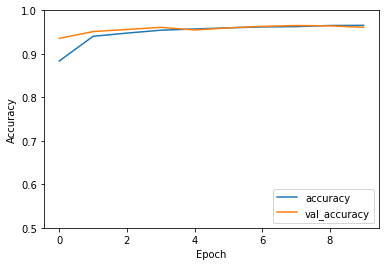

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

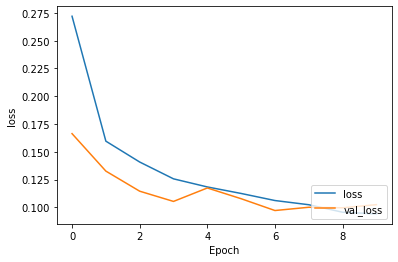

In [26]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')

plt.legend(loc='lower right')
plt.show()